<h1 align='center'> COMP2420/COMP6420 - Introduction to Data Management,<br/> Analysis and Security</h1>

<h1 align='center'> Assignment - 1</h1>

-----
<br/>

## Grading

|**Maximum Marks**         |**100**
|--------------------------|--------
|  **Weight**              |  **10% of the Total Course Grade**
|  **Submission deadline** |  **7:00PM, Thursday, April 4**
|  **Submission mode**     |  **Electronic, Using GitLab**
|  **Estimated time**      |  **10 hours**
|  **Penalty**             |  **100% after the deadline**
  


## Submission

You need to submit the notebook `Assignment-1.ipynb` as part of your submission by pushing it to your forked GitLab repository. You need to add your student details below. Any changes to file name will mean your file can't be marked by the auto-grader, resulting in a `zero mark`.


### Note:

* It is strongly advised to read the whole assignment before attempting it and have at least a cursory glance at the dataset in order to gauge the requirements and understand what you need to do as a bigger picture.

* For answers requiring free form written text, use the designated cells denoted by `YOUR ANSWER HERE` -- double click on the cell to write inside them.

* For all coding questions please write your code after the comment `YOUR CODE HERE`.

* In the process of testing your code, you can insert more cells or use print statements for debugging, but when submitting your file remember to remove these cells and calls respectively.

* You will be marked on **correctness** and **readability** of your code, if your marker can't understand your code your marks may be deducted. 

<span style="color:blue">
    
### Student ID :  u6660171

### Student Name: JIAZONG GONG
</span>

## Introduction

**Bicycle Sharing Systems** are a healthy, cheap and green way to navigate between one place to another. Now with the new generation of electronic registration and sharing, the whole process of transportation, right from the membership to the rental and returning back has become convenient and automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Bike sharing companies like **Mobike**, **OBike** and **AirBike** have grown pretty popular throughout Australia in the past few years, due to them being environment-friendly, pro-health and not to mention, a cheap and convenient mode of transport.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for research. Opposed to other transport services such as bus or subway, the **duration of travel**, **departure** and **arrival position** is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

## Data

You have been given a file named **bike-share.csv** which contains a dataset of two years of historical log corresponding to years 2011 and 2012 from **Capital Bikeshare** System, Washington D.C., USA. The dataset has 15 attributes such as **date**, **weekday/weekend/public holiday**, **weather situation**, **temperature** and **the count of number of bikes rented on that day**. Based on this data, our primary aim in this assignment is to visualise and analyse any insights we can get from this data and then predict a trend in the bike rentals.


_Refer to **bike-share-README.txt** for more information on the various attributes present in this data._

In [148]:
# IMPORTING FREQUENTLY USED PYTHON MODULES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-notebook')
%matplotlib inline

# JUST TO MAKE SURE SOME WARNINGS ARE IGNORED 
import warnings
warnings.filterwarnings("ignore")

In [149]:
# IMPORT ANY OTHER REQUIRED MODULES IN THIS CELL
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## LOAD THE DATA

Load the data into a Pandas DataFrame and make it ready for use for analysis and visualization.<span style= 'float: right;'><b>[5 marks]</b></span>

**HINTS** -
* You might need to split some columns into two or combine two columns into one to make them more useful from an analysis point-of-view.
* You might need to rename some columns so that they make sense to you.
* You might need to cast some of the columns into their appropriate datatypes and/or remove any unnecessary characters that may hinder computation.

In [281]:

bikes = pd.read_csv('bike-share.csv')
bikes.rename(columns={'instant':'record index', 'dteday':'date', 'yr':'year', 'mnth':'month', 'temp':'temperature', 'atemp':'feeling temperature', 'hum':'humidity', 'cnt':'rented'}, inplace = True)
bikes['temperature'] = bikes['temperature'].map(lambda x: 41*x)  
bikes['feeling temperature'] = bikes['feeling temperature'].map(lambda x: 50*x)
bikes['humidity'] = bikes['humidity'].map(lambda x: 100*x)
bikes['windspeed'] = bikes['windspeed'].map(lambda x: 41*x)
bikes.eval('new1=humidity/(month+0.01)', inplace=True)
bikes.eval('new2=windspeed/(month+0.01)', inplace=True)
bikes.eval('new3=weathersit/(month+0.01)', inplace=True)
bikes.eval('new4=temperature/(weathersit+0.01)', inplace=True)
bikes.eval('new5=temperature/(year+0.01)', inplace=True)
bikes.eval('new6=weathersit/(year+0.01)', inplace=True)
bikes[:]

,record index,date,season,year,month,holiday,weekday,workingday,weathersit,temperature,...,windspeed,casual,registered,rented,new1,new2,new3,new4,new5,new6
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,...,6.578286,331,654,985,79.785446,6.513154,1.980198,7.020322,1411.084700,200.000000
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,...,10.190099,131,670,801,68.919505,10.089207,1.980198,7.414228,1490.259800,200.000000
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,...,10.180669,120,1229,1349,43.294356,10.079870,0.990099,7.971212,805.092400,100.000000
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,...,6.572136,108,1454,1562,58.458911,6.507065,0.990099,8.118812,820.000000,100.000000
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,...,7.662900,82,1518,1600,43.263069,7.587030,0.990099,9.213106,930.523700,100.000000
5,6,2011-01-06,1,0,1,0,4,1,1,8.378268,...,3.672173,88,1518,1606,51.312970,3.635815,0.990099,8.295315,837.826800,100.000000
6,7,2011-01-07,1,0,1,0,5,1,2,8.057402,...,6.917766,148,1362,1510,49.375842,6.849273,1.980198,4.008658,805.740200,200.000000
7,8,2011-01-08,1,0,1,0,6,0,2,6.765000,...,10.938964,68,891,959,53.052772,10.830657,1.980198,3.365672,676.500000,200.000000
8,9,2011-01-09,1,0,1,0,0,0,1,5.671653,...,14.839950,54,768,822,42.986832,14.693020,0.990099,5.615498,567.165300,100.000000
9,10,2011-01-10,1,0,1,0,1,1,1,6.184153,...,9.153947,41,1280,1321,47.813564,9.063314,0.990099,6.122924,618.415300,100.000000


<span style="color:blue">
    
### The normalized values are changed into their original values. 
### Some of the column names are changed to make them easy to understand. 


</span>

## EXPLORATORY DATA ANALYSIS

In this section you are expected to do an exploratory data analysis on the dataset that you've just loaded and readied. <span style= 'float: right;'><b>[15 marks]</b></span>

**HINTS** -

* Explore your data both statistically and visually, in order to find some statistical insights about your data.
* Announce some descriptive stats on your data and explain what they mean in the context of this dataset.

In [129]:
# statistical data analysis 
# data type analysis
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
record index           731 non-null int64
date                   731 non-null object
season                 731 non-null int64
year                   731 non-null int64
month                  731 non-null int64
holiday                731 non-null int64
weekday                731 non-null int64
workingday             731 non-null int64
weathersit             731 non-null int64
temperature            731 non-null float64
feeling temperature    731 non-null float64
humidity               731 non-null float64
windspeed              731 non-null float64
casual                 731 non-null int64
registered             731 non-null int64
rented                 731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [130]:
# data mean, median and mode
bikes.describe()

,record index,season,year,month,holiday,weekday,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,casual,registered,rented
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,7.809935,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,3.177413,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,0.918060,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,5.532950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,7.419975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,9.561794,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,20.805983,3410.000000,6946.000000,8714.000000


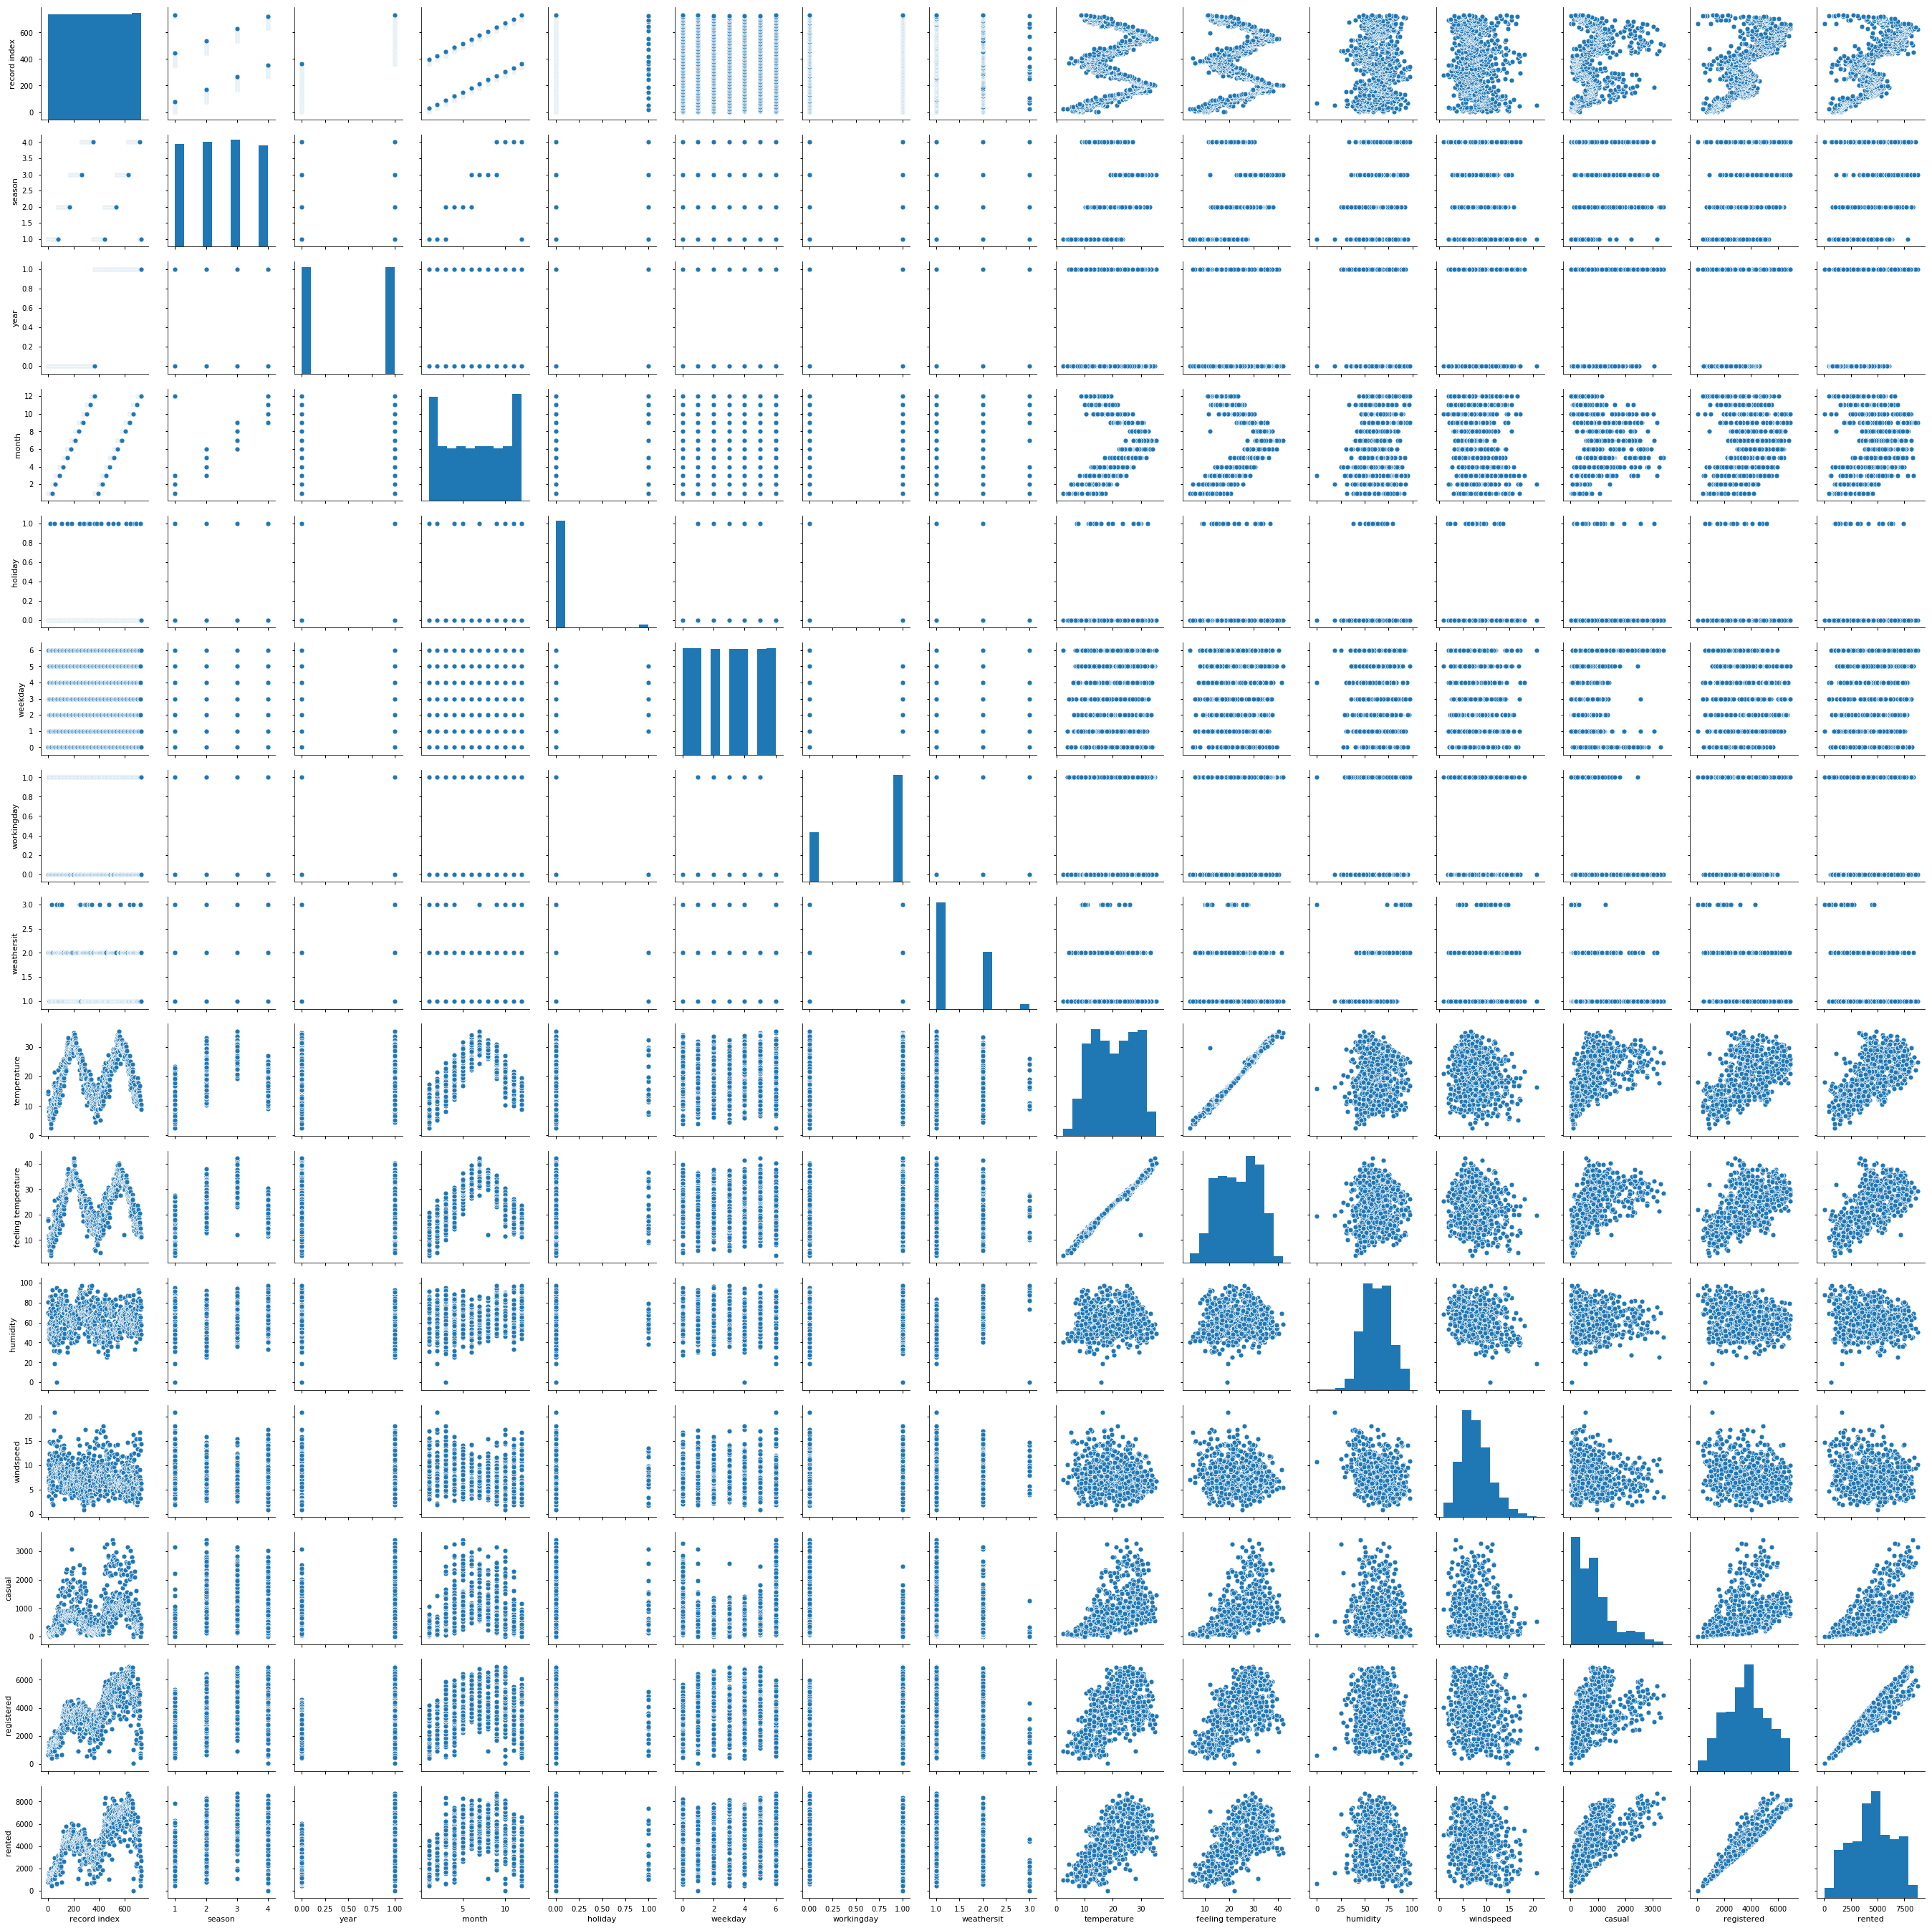

In [131]:
sns.pairplot(bikes)

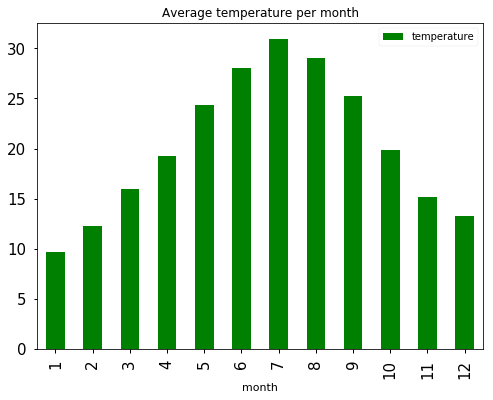

In [126]:
# average temperature per month
temperature = bikes[['month', 'temperature']]
temperature = temperature.groupby('month')['temperature'].mean()
temperature = temperature.to_frame()
temperature.plot.bar(title='Average temperature per month', color='green', fontsize=15, figsize=(8, 6))

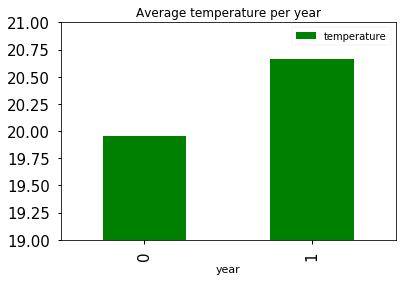

In [127]:
# average temperature of two years
temperature_year = bikes[['year', 'temperature']]
temperature_year = temperature_year.groupby('year')['temperature'].mean()
temperature_year = temperature_year.to_frame()
temperature_year.plot.bar(title='Average temperature per year', color='green', fontsize=15, ylim=(19, 21))

<span style="color:blue">
    
### Bar plots are suitable for visualising the comparison between values
### The average temperature per month plot shows that this place is located at subtropics in the northern hemisphere. 
### The temperature difference between all year is not promonent and the temperature is not too high in summer so that maybe it is a good place for vacation. 
### With comparison between average temperature of two years, it is found that the average temperature of 2012 is a littl higher than that of 2011 so that global warming has impact on this area as well. 


</span>

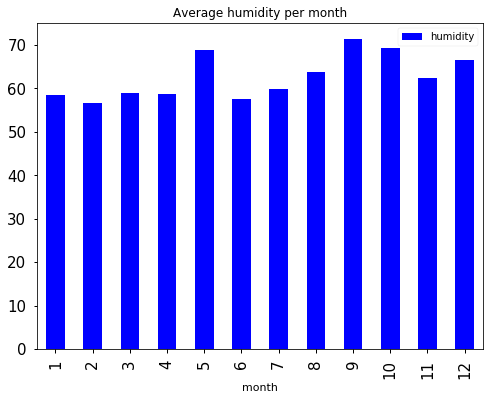

In [100]:
# average humidity per month
humidity = bikes[['month', 'humidity']]
humidity = humidity.groupby('month')['humidity'].mean()
humidity = humidity.to_frame()
humidity.plot.bar(title='Average humidity per month', color='blue', fontsize=15, figsize=(8, 6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E493E4940>],
      dtype=object)

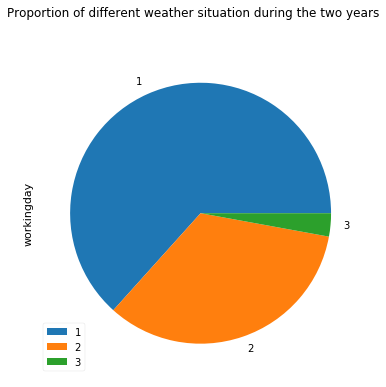

In [99]:
# proportion of weather situation
weathersit = bikes[['weathersit', 'workingday']]
weather = weathersit.groupby('weathersit')['workingday'].count()
weather = weather.to_frame()
weather.plot.pie(subplots=True, title='Proportion of different weather situation during the two years', figsize=(8, 6))

<span style="color:blue">
    
### Pie charts are used to show proportion
### From the plots above, it is clear that it is usually sunny day, frequently cloudy and rarely rainy or snowy. 
### However, the humidity of this place is quite high so that this place may be located at somewhere humid all year, possibly a coastal city. 


</span>

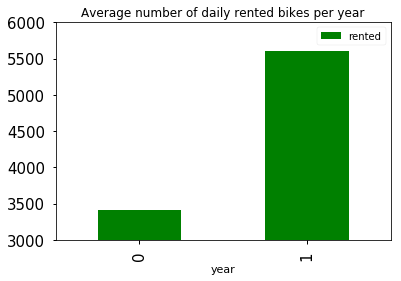

In [52]:
# average number of rented bikes per year
rented_year = bikes[['year', 'rented']]
rented_year = rented_year.groupby('year')['rented'].mean()
rented_year = rented_year.to_frame()
rented_year.plot.bar(title='Average number of daily rented bikes per year', color='green', fontsize=15, ylim=(3000, 6000))

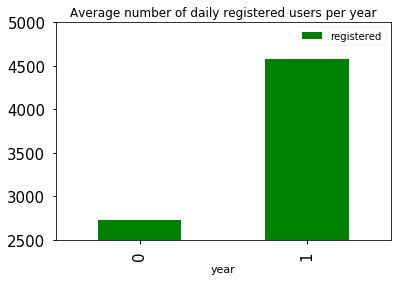

In [57]:
# average number of registered users per year
registered_year = bikes[['year', 'registered']]
registered_year = registered_year.groupby('year')['registered'].mean()
registered_year = registered_year.to_frame()
registered_year.plot.bar(title='Average number of daily registered users per year', color='green', fontsize=15, ylim=(2500, 5000))

<span style="color:blue">
    
### It show that the average number of rented bikes rose from less than 3500 per day to about 5500 per day and the average registered users rose from less than 3000 daily to around 4500 daily. 

### The bike-rental company is getting better. 


</span>

## DATA ANALYSIS

In this section, use your data slicing and dicing skills to come up with specialised analysis on a subset of the data. Let's see if you can answer these specific analysis questions. You are expected to plot appropriate graphs / plots and explain your analysis (using Markdown text) wherever necessary. 

### 1. Is there any relationship between weather situation / outside temperature and the number of bikes rented on a given day? 
<span style= 'float: right;'><b>[10 marks]</b></span>

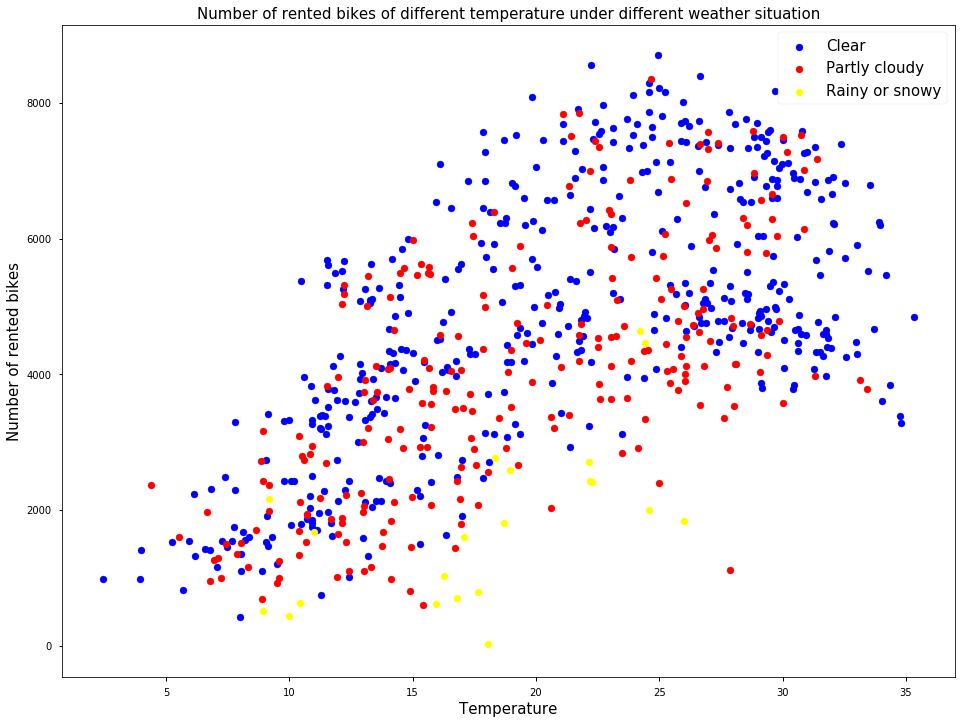

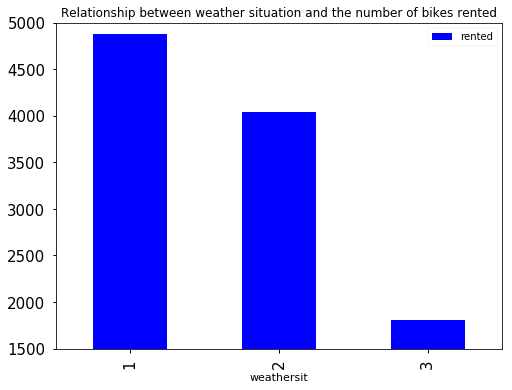

In [64]:
# average number of rented bikes under different weather situation
weather = bikes[['weathersit', 'temperature', 'rented']]

weather1 = weather[(weather['weathersit'] == 1)]
weather2 = weather[(weather['weathersit'] == 2)]
weather3 = weather[(weather['weathersit'] == 3)]

plt.figure(figsize=(16, 12))
plt.xlabel('Temperature', fontsize=15)
plt.ylabel('Number of rented bikes', fontsize=15)
plt.title('Number of rented bikes of different temperature under different weather situation', fontsize=15)
plt.scatter(weather1.temperature, weather1.rented, color='blue')
plt.scatter(weather2.temperature, weather2.rented, color='red')
plt.scatter(weather3.temperature, weather3.rented, color='yellow')
plt.legend(labels=['Clear', 'Partly cloudy', 'Rainy or snowy'], fontsize=15)   
plt.show()


weather = bikes[['weathersit', 'rented']]
weather = weather.groupby('weathersit')['rented'].mean()
weather = weather.to_frame()
weather.plot.bar(title='Relationship between weather situation and the number of bikes rented', color='blue', fontsize=15, ylim=(1500, 5000), figsize=(8, 6))

<span style="color:blue">
    
### Scatter plots are used to compare values when there are two or three factors. The scatter plot above is not so clear that I drew another two plots. 
### From the bar plot above, it is quite obvious that the number of bikes rented on a given day can be significantly influenced by weather situation. 
### To be specific, bikes can be mostly rented if it is clear or partly cloudy. If there is mist or more clouds, the number will drop a little. 
### In contrast, bikes will be rented much less if it is rainy or cloudy. 
### To conclude, the bikes seem to be rented more if it is a nice day. 

</span>

[1677.7666666666667, 3692.274247491639, 5661.6866666666665, 5409.958333333333]


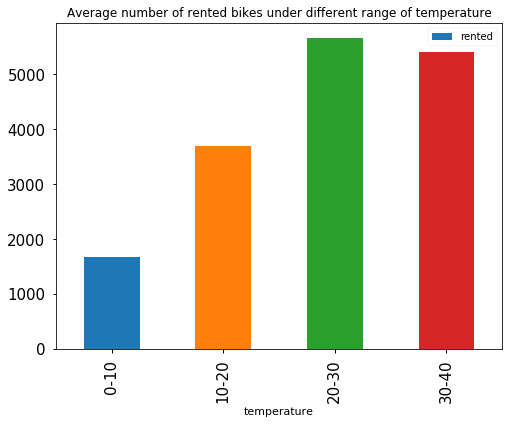

In [65]:
# average number of rented bikes under different temperature
temp = bikes[['temperature', 'rented']]
temp0 = temp[(temp['temperature'] > 0) & (temp['temperature'] <= 10)]
temp1 = temp[(temp['temperature'] > 10) & (temp['temperature'] <= 20)]
temp2 = temp[(temp['temperature'] > 20) & (temp['temperature'] <= 30)]
temp3 = temp[(temp['temperature'] > 30) & (temp['temperature'] <= 40)]
temp0 = temp0['rented'].mean()
temp1 = temp1['rented'].mean()
temp2 = temp2['rented'].mean()
temp3 = temp3['rented'].mean()
rent = list((temp0, temp1, temp2, temp3))
lab = ['0-10', '10-20', '20-30', '30-40']
rent_temp = pd.DataFrame({'temperature': lab, 'rented': rent})
rent_temp.plot.bar(x='temperature', y='rented', title='Average number of rented bikes under different range of temperature', fontsize=15, figsize=(8, 6))

print(rent)


<span style="color:blue">
    
### The plot shows that the number of rented bikes reaches the top when it is from 20 to 30 degrees. 
### When it is less than this range, the number rises with rising temperature and vice versa. 

</span>

### 2. Is there any relationship between the day of the week / holiday and the number of bikes rented on a given day?
<span style= 'float: right;'><b>[10 marks]</b></span>

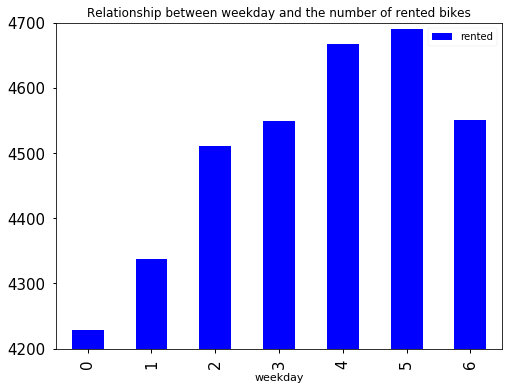

In [97]:
# day of the week and the number of bikes rented

days = bikes[['weekday', 'rented']]
days = days.groupby('weekday')['rented'].mean()
days = days.to_frame()
days.plot.bar(title='Relationship between weekday and the number of rented bikes', color='blue', fontsize=15, ylim=(4200, 4700), figsize=(8, 6))

<span style="color:blue">
    
### The number of rented bikes is largely influenced by the day of the week. 
### From the plot above, it seems that people would rather rent bikes on Friday and Thursday than on Sunday and Monday. 
### Maybe they usually drive their cars to somewhere on weekends so that they do not need to rent bikes. 


</span>

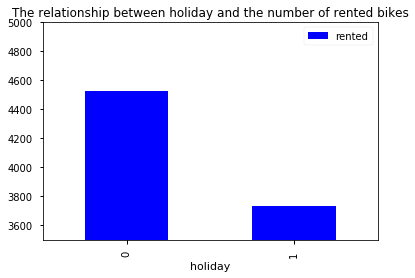

In [11]:
# holiday and the number of rented bikes
holi = bikes[['holiday', 'rented']]
holi = holi.groupby('holiday')['rented'].mean()
holi = holi.to_frame()
holi.plot.bar(title='The relationship between holiday and the number of rented bikes', color='blue', fontsize=15, ylim=(3500, 5000))

<span style="color:blue">
    
### The plot shows that the number of rented bikes on workingday is larger than that in holiday. 
### Maybe people prefer to rent bikes to work place and they usually drive cars or stay at home on weekends.
### According to this, the companies offering bike-rent service are supposed to repaire some damaged bikes to fix some problems. 


</span>

### 3. How do the number of registered and casual users vary with respect to each other during holidays and work days? 
<span style= 'float: right;'><b>[15 marks]</b></span>

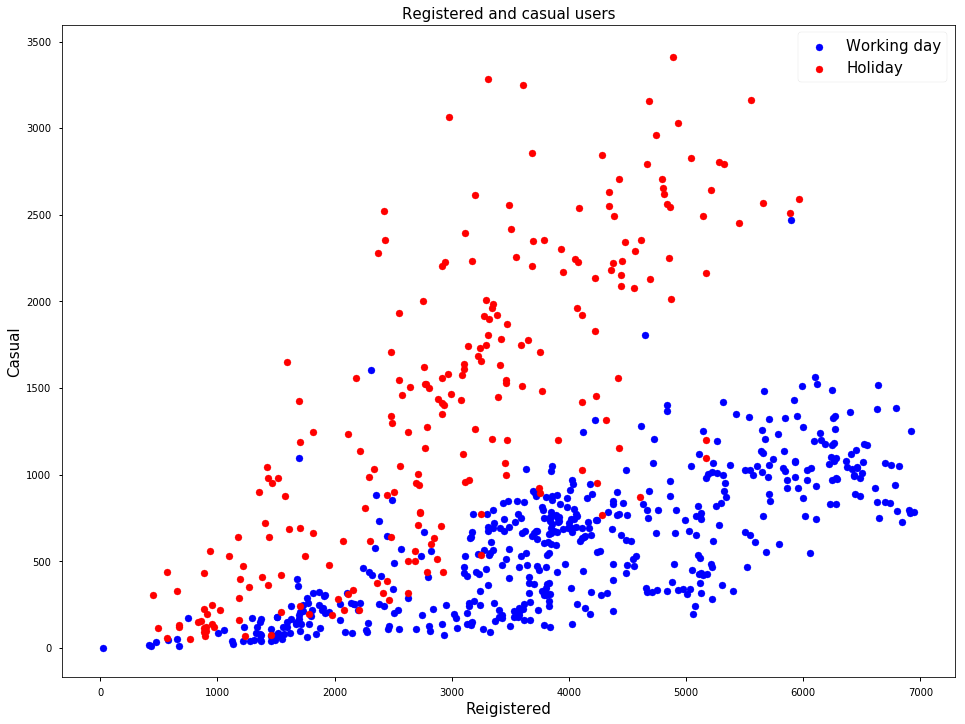

In [102]:
# registered and casual users
working = bikes[['workingday', 'registered', 'casual']]
not_working = bikes[['workingday', 'registered', 'casual']]
working = working[(working['workingday'] == 1)]
not_working = not_working[(not_working['workingday'] == 0)]

plt.figure(figsize=(16, 12))
plt.xlabel('Reigistered', fontsize=15)
plt.ylabel('Casual', fontsize=15)
plt.title('Registered and casual users', fontsize=15)
plt.scatter(working.registered, working.casual, color='blue')
plt.scatter(not_working.registered, not_working.casual, color='red')
plt.legend(labels=['Working day', 'Holiday'], fontsize=15)   
plt.show()


<span style="color:blue">
    
### It shows that there are more registered users on workingdays than casual users because maybe there are some people using bikes as their travel mode to work or school. Consequently, this group of people prefer to register an account for future convenience. 
### On the contrary, there are more visitors or people having break on holidays, in which case they prefer not to register an account because they just rent bikes for a while and probably will not use them often. As a consequence, there seems to be more casual users on holidays. 


</span>

### 4. What relationship can you find among the attributes relating to weather in this dataset?
<span style= 'float: right;'><b>[6 marks]</b></span>

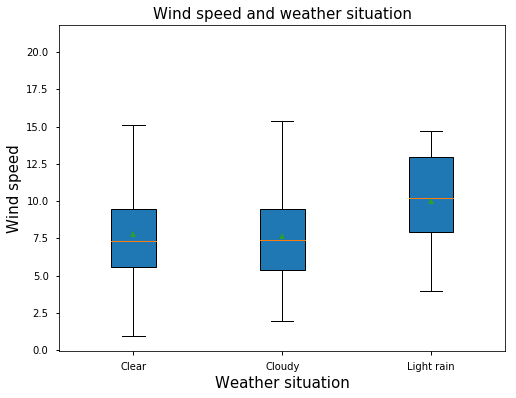

In [103]:
# windspeed 
weather = bikes[['weathersit', 'windspeed']]
weather1 = weather[(weather['weathersit'] == 1)]
weather2 = weather[(weather['weathersit'] == 2)]
weather3 = weather[(weather['weathersit'] == 3)]
plt.figure(figsize=(8, 6))
plt.xlabel('Weather situation',fontsize=15)
plt.ylabel('Wind speed',fontsize=15)
plt.title('Wind speed and weather situation',fontsize=15)
plt.boxplot([weather1['windspeed'], weather2['windspeed'], weather3['windspeed'] ], patch_artist='blue', showmeans=True, labels=['Clear','Cloudy', 'Light rain'])
plt.show()

<span style="color:blue">
    
### Box plots can show the maximum, median and minimum of the data. 
### Windspeed can be influenced by weather situation. 
### The windspeed is usually higher if it is rainy or snowy.


</span>

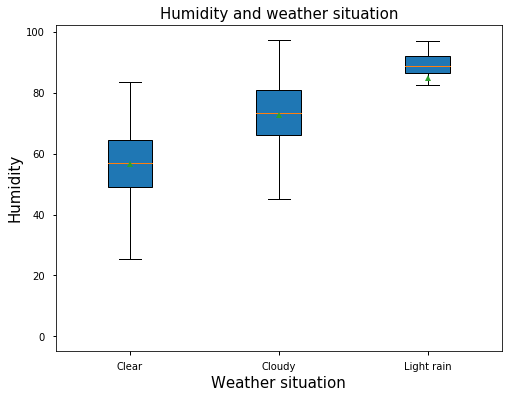

In [104]:
# humidity
weather = bikes[['weathersit', 'humidity']]
weather1 = weather[(weather['weathersit'] == 1)]
weather2 = weather[(weather['weathersit'] == 2)]
weather3 = weather[(weather['weathersit'] == 3)]
plt.figure(figsize=(8, 6))
plt.xlabel('Weather situation',fontsize=15)
plt.ylabel('Humidity',fontsize=15)
plt.title('Humidity and weather situation',fontsize=15)
plt.boxplot([weather1['humidity'], weather2['humidity'], weather3['humidity'] ], patch_artist='blue', showmeans=True, labels=['Clear','Cloudy', 'Light rain'])
plt.show()


<span style="color:blue">
    
### Of course it is more humid if it is rainy or snowy...


</span>

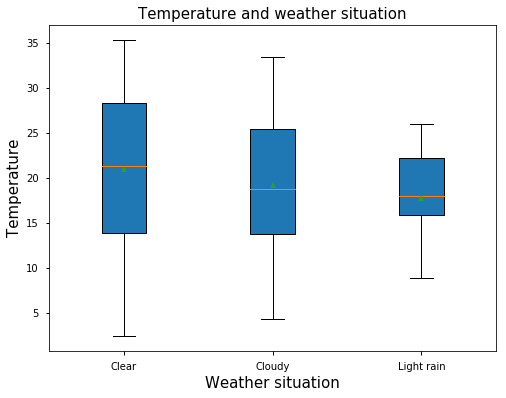

In [105]:
# temperature
weather = bikes[['weathersit', 'temperature']]
weather1 = weather[(weather['weathersit'] == 1)]
weather2 = weather[(weather['weathersit'] == 2)]
weather3 = weather[(weather['weathersit'] == 3)]
plt.figure(figsize=(8, 6))
plt.xlabel('Weather situation',fontsize=15)
plt.ylabel('Temperature',fontsize=15)
plt.title('Temperature and weather situation',fontsize=15)
plt.boxplot([weather1['temperature'], weather2['temperature'], weather3['temperature'] ], patch_artist='blue', showmeans=True, labels=['Clear','Cloudy', 'Light rain']) 
plt.show()

<span style="color:blue">
    
### The average of temperature is not much influenced by weather situation but the temperature difference can be a littl different. 
### To be more specific, the temperature does not vary much if it is rainy or snowy. 


</span>

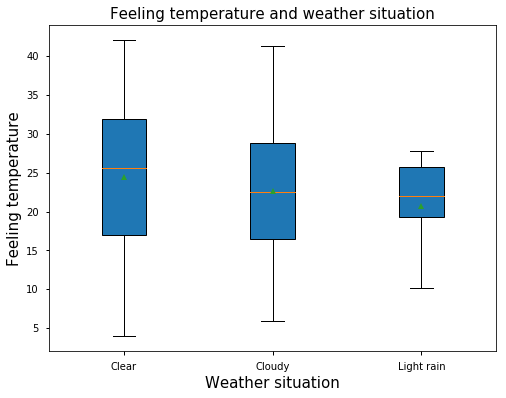

In [106]:
# feeling temperature
weather = bikes[['weathersit', 'feeling temperature']]
weather1 = weather[(weather['weathersit'] == 1)]
weather2 = weather[(weather['weathersit'] == 2)]
weather3 = weather[(weather['weathersit'] == 3)]
plt.figure(figsize=(8, 6))
plt.xlabel('Weather situation',fontsize=15)
plt.ylabel('Feeling temperature',fontsize=15)
plt.title('Feeling temperature and weather situation',fontsize=15)
plt.boxplot([weather1['feeling temperature'], weather2['feeling temperature'], weather3['feeling temperature'] ], patch_artist='blue', showmeans=True, labels=['Clear','Cloudy', 'Light rain']) 
plt.show()

<span style="color:blue">
    
### The feeling temperature is quite similar to temperature. 


</span>

### 5. From this dataset, find out something that this data doesn’t show you directly, but you find interesting about this dataset.
<span style= 'float: right;'><b>[14 marks]</b></span>

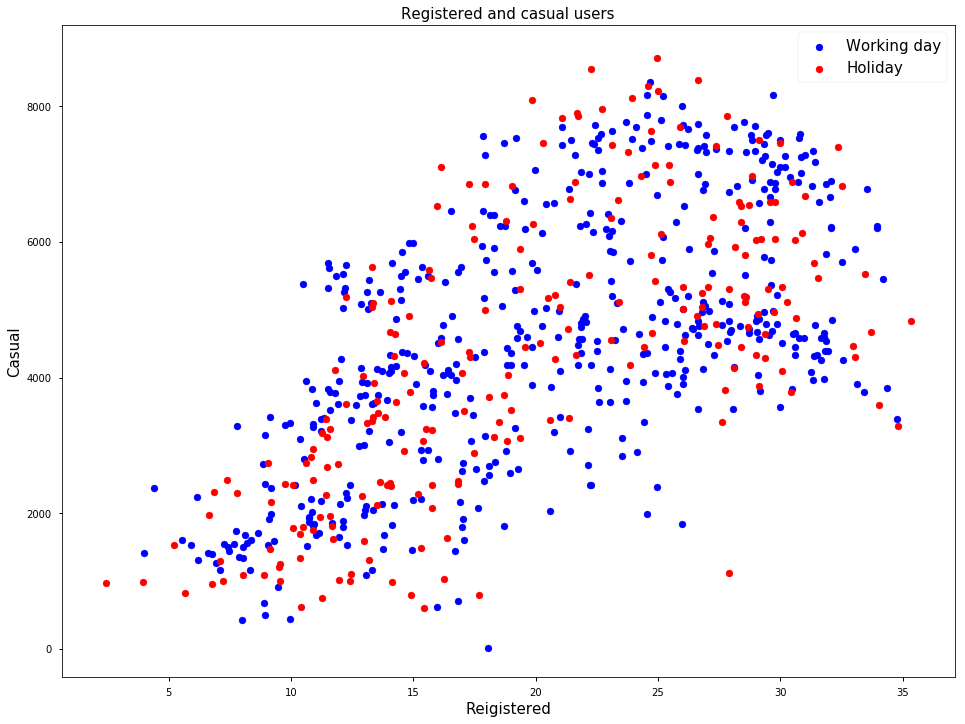

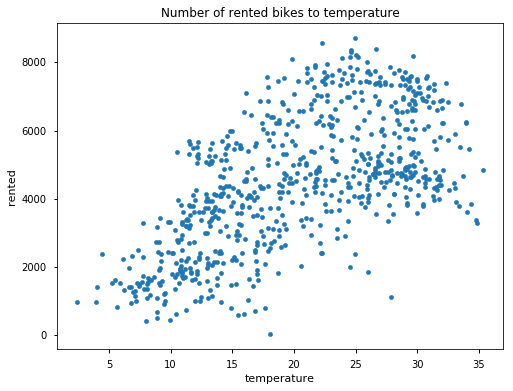

In [63]:
# number of rented bikes and temperature

working = bikes[['workingday', 'temperature', 'rented']]
not_working = bikes[['workingday', 'temperature', 'rented']]
working = working[(working['workingday'] == 1)]
not_working = not_working[(not_working['workingday'] == 0)]

plt.figure(figsize=(16, 12))
plt.xlabel('Reigistered', fontsize=15)
plt.ylabel('Casual', fontsize=15)
plt.title('Registered and casual users', fontsize=15)
plt.scatter(working.temperature, working.rented, color='blue')
plt.scatter(not_working.temperature, not_working.rented, color='red')
plt.legend(labels=['Working day', 'Holiday'], fontsize=15)   
plt.show()

w = bikes[['temperature', 'rented']]
w.plot.scatter(x='temperature', y='rented', title='Number of rented bikes to temperature', figsize=(8, 6))

# (ADD ANY ADDITIONAL CELLS AS REQUIRED)

<span style="color:blue">
    
### The plots show that the number of rented bikes reaches the maximum when the outside temperature reaches about 23 celcius, which, interestingly, is approximately the multiplication of normal body temperature and 0.618,   namely, the famous gloden ratio. 
### When the temperature is lower than this multiplication, people tend to rent more bikes when the temperature rises and vice versa. 


</span>

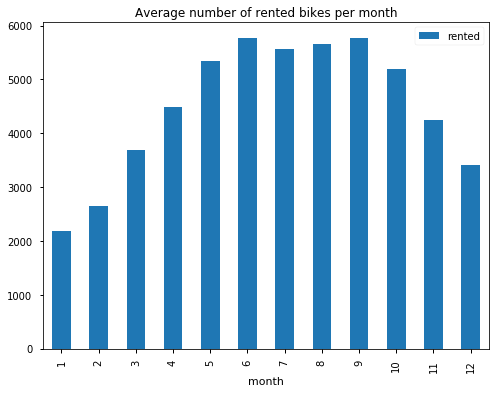

In [109]:
# average number of rented bikes per month
rented_month = bikes[['month', 'rented']]
rented_month = rented_month.groupby('month')['rented'].mean()
rented_month = rented_month.to_frame()
rented_month.plot.bar(title='Average number of rented bikes per month', figsize=(8, 6))

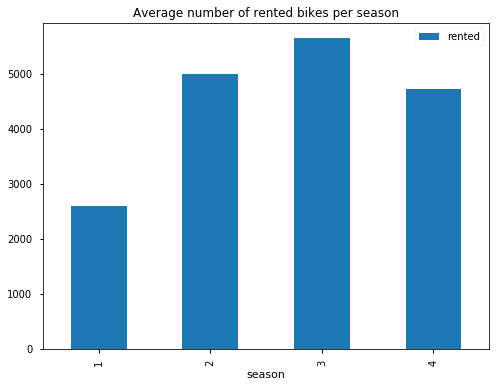

In [110]:
# average number of rented bikes per season
s = bikes[['season', 'rented']]
s = s.groupby('season')['rented'].mean()
s = s.to_frame()
s.plot.bar(title='Average number of rented bikes per season', figsize=(8, 6))

<span style="color:blue">
    
### The plot shows that the number of rented bikes reaches the maximum in June and September. 
### Maybe this result is because this period is summer vacation and people have more time to relax and they tend to rent bikes. The reason why the rental service is not the best in July and August is probably due to high temperature. 
### Overall, the bike company is supposed to put more bikes into service from April to October and take certain amount of bikes during other months. 


</span>

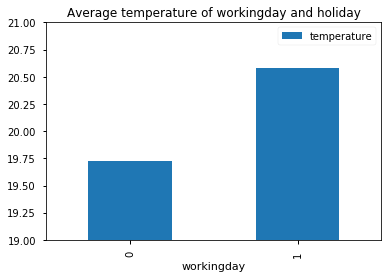

In [80]:
# average temperature of working day and holiday
temp = bikes[['workingday', 'temperature']]
temp = temp.groupby('workingday')['temperature'].mean()
temp= temp.to_frame()
temp.plot.bar(title='Average temperature of workingday and holiday', ylim=(19, 21))

<span style="color:blue">
    
### This is the most intereseting part of the data. The average temperature of working day is slightly higher than that of holiday. This 'Holiday effect' may be due to the reduction of waste heat and less anthropogenic heat release during holiday. 

</span>

## LINEAR REGRESSION

Now comes the fun part! In this section you have to implement a **Linear Regression Model**. Companies like **Mobike** and **AirBike** would like to make some predictions on their sales for the next few years. A linear Regression Model will help them predict the growth of their company in the coming years.

Your job is to implement a Linear Regression Model that predicts the number of bikes rented daily, based on the environmental and seasonal variables. There are multiple ways of doing this in Python. You are free to use any Python modules you like for this implementation. 
<span style= 'float: right;'><b>[25 marks]</b></span>

In [12]:
data = bikes[['season', 'year', 'month', 'weathersit', 'feeling temperature', 'humidity', 'windspeed', 'new1', 'new2', 'new3', 'new4', 'new5', 'new6', 'rented']]
features = data[['season', 'year', 'month', 'weathersit',  'feeling temperature', 'humidity', 'windspeed', 'new1', 'new2', 'new3', 'new4', 'new5', 'new6']].values
target = data['rented'].values
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, train_size=0.67, random_state=111111)
lm = LinearRegression()
lm.fit(X_train, y_train)
beta = lm.coef_
intercept = lm.intercept_
# predicted = np.sum(np.multiply(X_test[1, :], beta)) + intercept
# print(predicted)

In [13]:
y1 = np.mean(y_test)
y_test = np.array(y_test)
predicted = []
for x in X_test:
    predicted.append(np.array(np.sum(np.multiply(x, beta)) + intercept))
predicted = np.array(predicted)
R2 = 1 - (np.sum(np.multiply((y_test - predicted), (y_test - predicted)))) / (np.sum(np.multiply((y_test - y1), (y_test - y1))))
print(R2)
rmse = np.sqrt(((predicted - y_test) ** 2).mean())
print(rmse)

0.8300397238889571
765.6859775695208


In [14]:
r2 = lm.score(X_test ,y_test)
print(r2)

0.8300397238889571


<span style="color:blue">
    
### I  tried to add or remove some factors at first and removed 'temperature'.  
### After adding and removing, I created some new columns by combining different factors and tried to make sense according to the influence weight of each factor. After the combination, I found that the Rsquare value is getting better when I created and introduced these factors. 


</span>